In [2]:
from matplotlib.image import imread
import numpy as np
import matplotlib.pyplot as plt
import os
from os.path import isfile, join
import pywt
#from tqdm.auto import tqdm
from tqdm import tqdm

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.cwt.html

using scipy for continuous wt, and plotting.


In [3]:
dirname = '/Volumes/TOSHIBA_EXT/Phenotype_features_collective/Data/ExtractedFrames/JU775/2.2_6_ju775_7a_Set0_Pos0_Ch1_18012018_144528'

fnames=sorted(  [fname for fname in os.listdir(dirname) if fname.endswith('.tif')],
             key=lambda f: int( f.rsplit(os.path.extsep,1)[0].rsplit('_t',1)[1].rsplit('c0x0',1)[0] )  )   #splitting the filenames to get the number out and turning it into integer for sorting.

print(fnames[-1])

IndexError: list index out of range

In [4]:
img = imread(dirname + fnames[17000])
img_1D = img.flatten()

plt.figure(figsize=(9,9))
plt.imshow(np.reshape(img_1D, img.shape) )

IndexError: list index out of range

In [5]:
int(len(fnames)/1000)

17

In [6]:
npr1_1_dwt_power = np.zeros( (int(len(img_1D)/2), int(len(fnames)/1000) ) )  #[half pixel number(frequency number), frame]
npr1_1_dwt_power[:] = np.nan
npr1_1_dwt_cA = np.zeros( (int(len(img_1D)/2), int(len(fnames)/1000) ) )  #[half pixel number(frequency number), frame]
npr1_1_dwt_cA[:] = np.nan
npr1_1_dwt_cD = np.zeros( (int(len(img_1D)/2), int(len(fnames)/1000) ) )  #[half pixel number(frequency number), frame]
npr1_1_dwt_cD[:] = np.nan

for t in tqdm( range( int(len(fnames)/1000) ) ):
    filename=dirname + fnames[1000*t]
        #reading each files
    img = imread(filename)

    img_1D = img.flatten()
    ind = np.arange(len(img_1D))
    cA, cD = pywt.dwt(img_1D, 'haar')

    npr1_1_dwt_power[:,t] = np.abs(cA)/len(img_1D)
    npr1_1_dwt_cA[:,t] = cA
    npr1_1_dwt_cD[:,t] = cD
    
    #fig = plt.subplots(figsize=(12,3))
    #plt.plot(np.arange(len(img_1D)/2)+1, np.abs(cA)/len(img_1D))   #power spectrum normalised by number of samples, or intervals
    #plt.ylim(0,0.015)
    #plt.title(fnames[t])
    #plt.ylabel('wavelet Coeff')
    #plt.xlabel('wavelet frequency')
    

100%|██████████| 17/17 [00:00<00:00, 19.76it/s]


In [18]:
np.save('npr1_1_dwt_power.npy',npr1_1_dwt_power)
np.save('npr1_1_dwt_cA.npy',npr1_1_dwt_cA)
np.save('npr1_1_dwt_cD.npy',npr1_1_dwt_cD)

TypeError: cannot pickle '_io.BufferedRandom' object

In [10]:
from tempfile import TemporaryFile

npr1_1_dwt_power=TemporaryFile()
npr1_1_dwt_cA=TemporaryFile()
npr1_1_dwt_cD=TemporaryFile()

np.save('npr1_1_dwt_power.npz',npr1_1_dwt_power)
np.save('npr1_1_dwt_cA.npz',npr1_1_dwt_cA)
np.save('npr1_1_dwt_cD.npz',npr1_1_dwt_cD)

np.savez_compressed('npr1_1_dwt_power.npz',data=ROI1_ccf_O2_num.data, mask=ROI1_ccf_O2_num.mask)
np.savez_compressed('npr1_1_dwt_cA.npz',data=ROI2_ccf_O2_num.data, mask=ROI2_ccf_O2_num.mask)
np.savez_compressed('npr1_1_dwt_cD.npz',data=ROI7_ccf_O2_num.data, mask=ROI7_ccf_O2_num.mask)

TypeError: cannot pickle '_io.BufferedRandom' object

In [ ]:
np.load('')

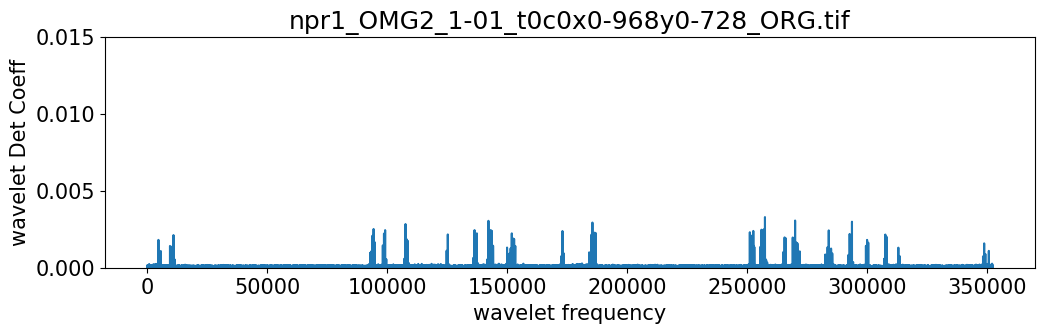

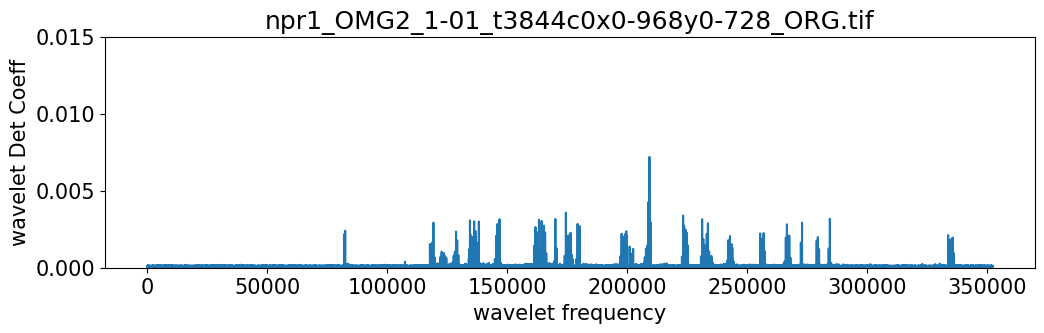

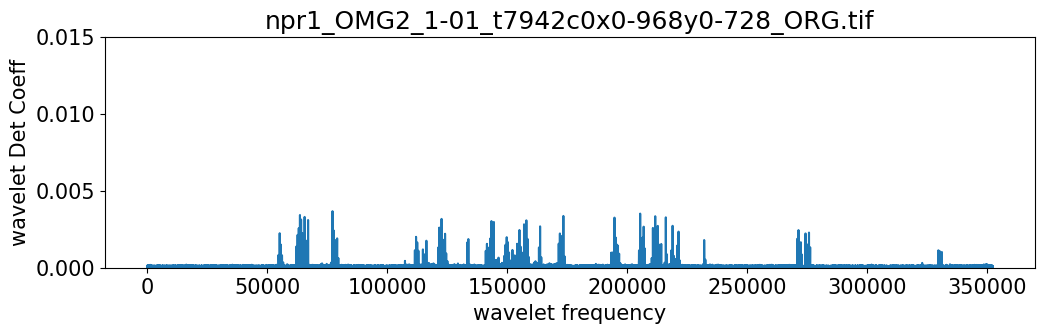

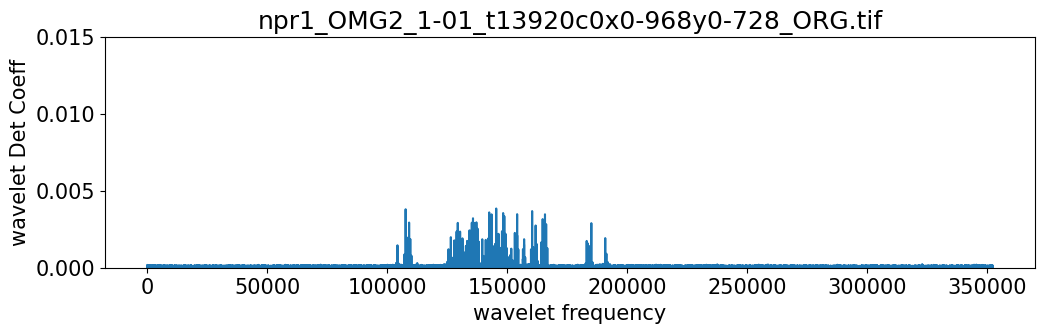

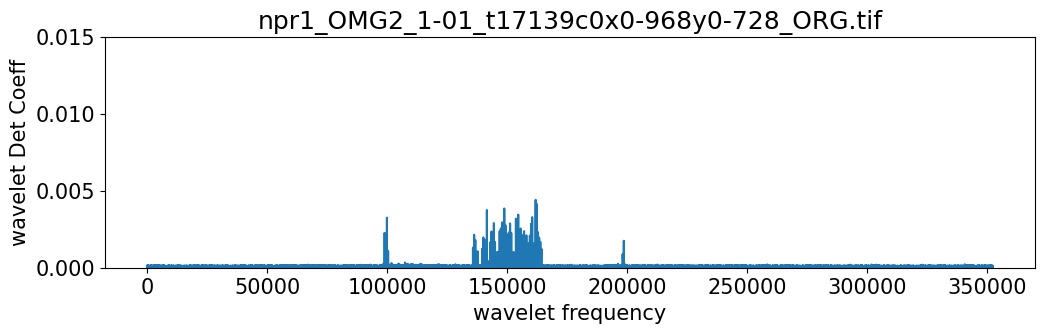

In [198]:
#for t in range(len(fnames)) :

#    fig = plt.subplots(figsize=(12,3))
#    plt.plot(np.arange(len(img_1D)/2)+1, np.abs( npr1_1_dwt_cD[:,t] )/len(img_1D))   #power spectrum normalised by number of samples, or intervals
#    plt.ylim(0,0.015)
#    plt.title(fnames[t])
#    plt.ylabel('wavelet Det Coeff')
#    plt.xlabel('wavelet frequency')

In [187]:
# setting thresholding point.

thresh = np.sort(npr1_1_dwt_power.flatten())[ int(0.9*len(npr1_1_dwt) ) ]
(npr1_1_dwt_power>thresh)*1

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

In [188]:
# mask for thresholding

npr1_1_dwt_power*( (npr1_1_dwt_power>thresh)*1 )

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [189]:
#sifting out the values thresholded.

(npr1_1_dwt_power*( (npr1_1_dwt_power>thresh)*1 ))[:,0]

array([0., 0., 0., ..., 0., 0., 0.])

Text(0.5, 0, 'wavelet frequency')

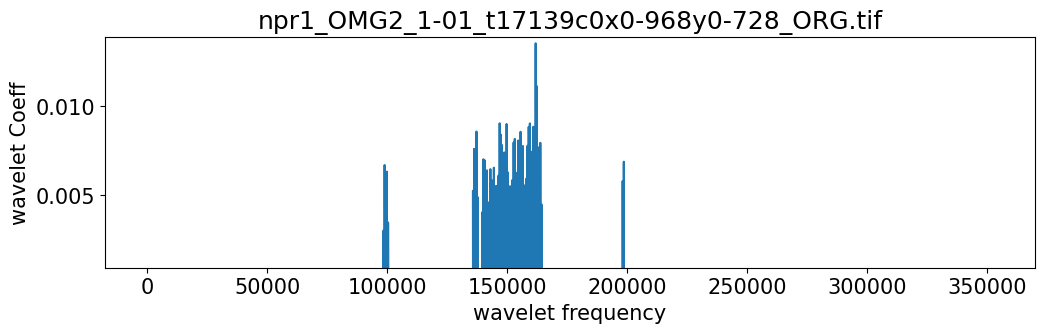

In [190]:
fig = plt.subplots(figsize=(12,3))
plt.plot(np.arange(len(img_1D)/2)+1, (npr1_1_dwt_power*( (npr1_1_dwt_power>0.003)*1 ))[:,4])   #power spectrum normalised by number of samples, or intervals
plt.ylim(min(npr1_1_dwt_power.flatten()),max(npr1_1_dwt_power.flatten()))
plt.title(fnames[t])
plt.ylabel('wavelet Coeff')
plt.xlabel('wavelet frequency')

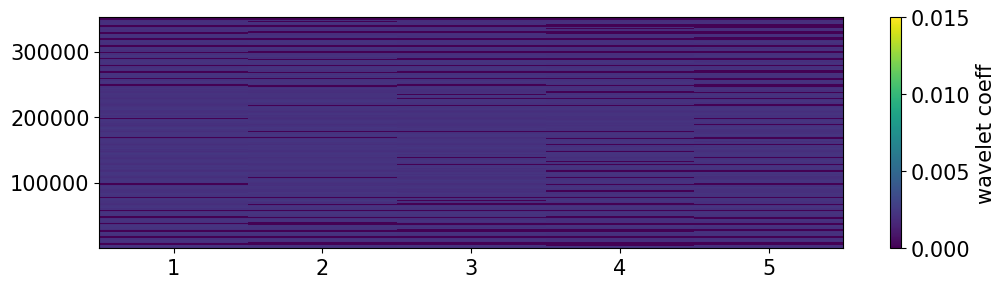

In [191]:
xgrid = np.arange(len(fnames))+1    #frame number, start from 1.
ygrid = np.arange(npr1_1_dwt_power.shape[0])+1   #wavelet frequencies start from 1.

fig,ax = plt.subplots(figsize=(12,3))
plt.pcolormesh(xgrid, ygrid, npr1_1_dwt_power*( (npr1_1_dwt_power>thresh)*1 ) , cmap='viridis', vmin=0.00, vmax=0.015)    #min(npr1_1_dwt.flatten()), vmax=max(npr1_1_dwt.flatten()) )
#ax.set_ylim(1,len(ygrid)+1)
plt.colorbar(label='wavelet coeff')

In [192]:
np.linspace(0.0,0.015,6)

array([0.   , 0.003, 0.006, 0.009, 0.012, 0.015])

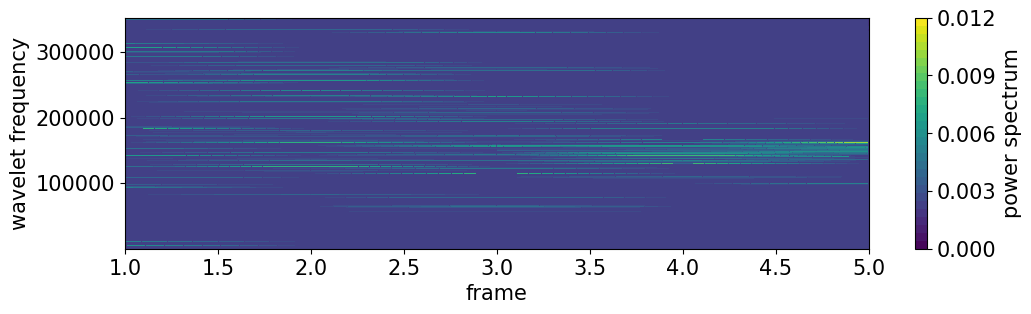

In [195]:
xgrid = np.arange(len(fnames))+1    #frame number
ygrid = np.arange(npr1_1_dwt_power.shape[0])+1   #wavelet frequencies
X,Y = np.meshgrid(xgrid, ygrid)

Z=npr1_1_dwt_power #*( (npr1_1_dwt>0.003)*1 )
levels=np.linspace(0.0,0.012,30)#Z.min(), Z.max(), 20)

plt.subplots(figsize=(12,3))
plt.contourf(X,Y,Z, levels=levels, cmap='viridis')
plt.ylabel('wavelet frequency')
plt.xlabel('frame')
plt.colorbar(ticks=np.linspace(0.0,0.012,5) ,label='power spectrum')
plt.show()

___
# reconstruction to image

(-0.5, 967.5, 727.5, -0.5)

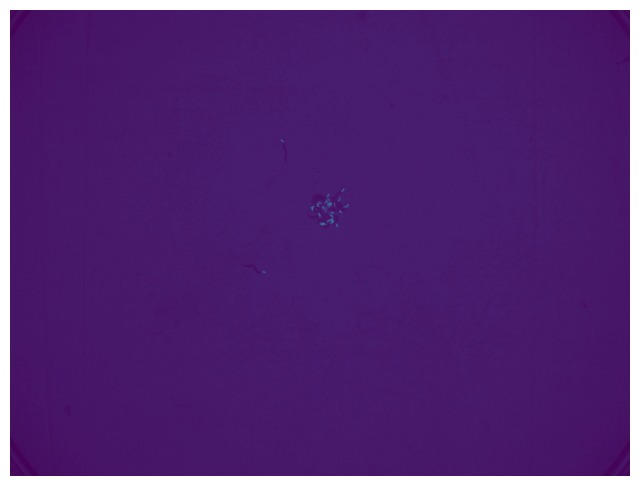

In [194]:
# Reconstructing single frame from wavelet coeff.

frame_5_idwt = pywt.idwt(npr1_1_dwt_cA[:,4], npr1_1_dwt_cD[:,4], 'haar')
frame_5_reconst = np.reshape(frame_5_idwt, img.shape)

plt.figure(figsize=(8,8))
plt.imshow(frame_5_reconst)  #,cmap='gray_r)
plt.axis('off')

(-0.5, 967.5, 727.5, -0.5)

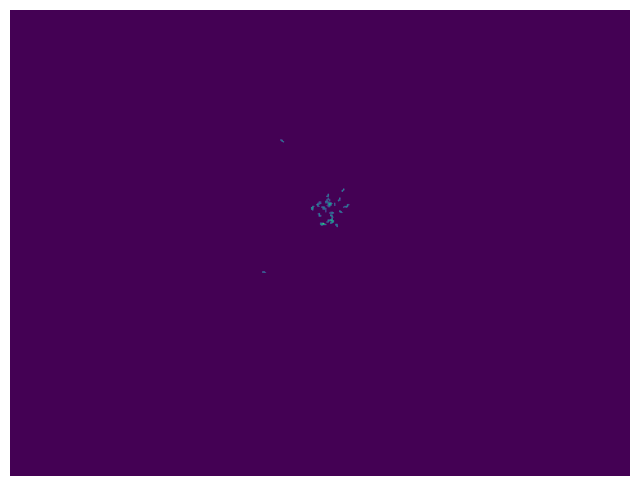

In [221]:
# Reconstructing single frame from compressed wavelet coeff.

temp_cA = npr1_1_dwt_cA[:,4]*( (npr1_1_dwt_cA[:,4]>0.003*len(img_1D) )*1 )
temp_cD = npr1_1_dwt_cD[:,4]*( (npr1_1_dwt_cD[:,4]>0.001*len(img_1D) )*1 )

frame_5_idwt = pywt.idwt(temp_cA, temp_cD, 'haar')
frame_5_reconst = np.reshape(frame_5_idwt, img.shape)

plt.figure(figsize=(8,8))
plt.imshow(frame_5_reconst)  #,cmap='gray_r)
plt.axis('off')

In [244]:
# generating Coefficients cA, cD.

single_cA = np.zeros( int(len(img_1D)/2) )
single_cD = np.zeros( int(len(img_1D)/2) )

single_cA[ int( np.mean(np.where( (npr1_1_dwt_cA[:,4]>0.003*len(img_1D) )*1==1 ) ) ) ] = np.mean(npr1_1_dwt_cA[:,4][npr1_1_dwt_cA[:,4]>0.003*len(img_1D)])
        #location is selected by the mean of location of all thresholded coeff.  #magnitude of coeff is the mean of the thresholded coeff.
single_cD[ int( np.mean(np.where( (npr1_1_dwt_cD[:,4]>0.001*len(img_1D) )*1==1 ) ) ) ] = np.mean(npr1_1_dwt_cD[:,4][npr1_1_dwt_cD[:,4]>0.001*len(img_1D)])

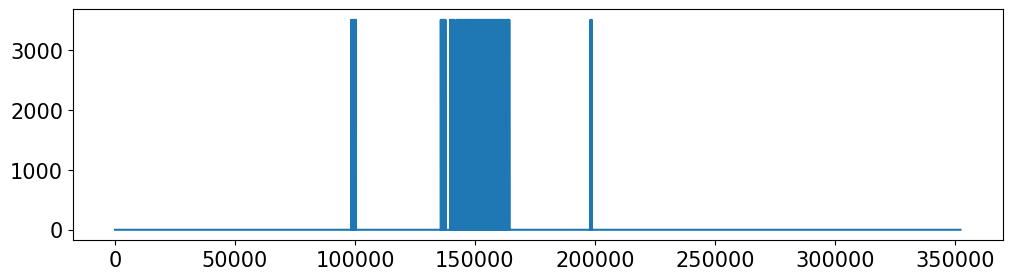

In [248]:
# generating Coefficients cA, cD.

single_cA = np.zeros( int(len(img_1D)/2) )
single_cD = np.zeros( int(len(img_1D)/2) )

single_cA[ np.where( (npr1_1_dwt_cA[:,4]>0.003*len(img_1D) )*1==1 )  ] = np.mean(npr1_1_dwt_cA[:,4][npr1_1_dwt_cA[:,4]>0.003*len(img_1D)])
        #location is selected by the mean of location of all thresholded coeff.  #magnitude of coeff is the mean of the thresholded coeff.
single_cD[ np.where( (npr1_1_dwt_cD[:,4]>0.001*len(img_1D) )*1==1 )  ] = np.mean(npr1_1_dwt_cD[:,4][npr1_1_dwt_cD[:,4]>0.001*len(img_1D)])

fig = plt.subplots(figsize=(12,3))
plt.plot(np.arange(len(img_1D)/2)+1, single_cA )   #power spectrum normalised by number of samples, or intervals

(-0.5, 967.5, 727.5, -0.5)

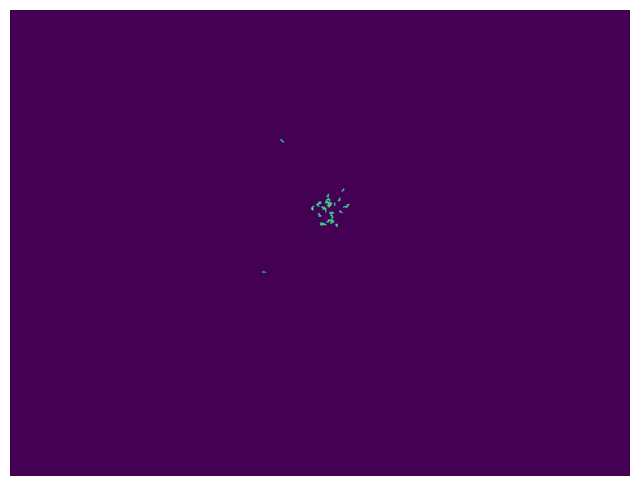

In [249]:
# Reconstructing frame 5 from predicted wavelet coeff.

predict_frame_5_idwt = pywt.idwt(single_cA, single_cD, 'haar')
predict_frame_5_reconst = np.reshape(predict_frame_5_idwt, img.shape)

plt.figure(figsize=(8,8))
plt.imshow(predict_frame_5_reconst)  #,cmap='gray_r)
plt.axis('off')